## Method Used

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

### Import the libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Create some data

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples= 200, n_features= 2, centers=4, cluster_std=1.8, random_state=101)

make_blobs(
    
    n_samples=100,
    n_features=2,
    *,
    centers=None,
    cluster_std=1.0,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=None,
    return_centers=False,
)

In [6]:
print(data)

(array([[-6.42884095e+00,  1.01411174e+01],
       [ 5.86867888e+00,  5.20110356e+00],
       [-3.76109375e-01,  3.26427943e+00],
       [ 2.16679181e+00,  9.56300522e+00],
       [ 5.09508570e+00,  7.20752718e+00],
       [-1.08788882e+01, -6.11318040e+00],
       [ 2.03405554e+00,  9.76664755e+00],
       [-1.71798771e+00,  1.41401140e+00],
       [ 1.16911341e+00,  8.24556988e+00],
       [-1.35185444e+00,  3.13245345e+00],
       [-6.18548214e+00,  9.67406555e+00],
       [-1.19856602e+00,  2.50408937e+00],
       [ 2.90296863e+00,  7.91251003e+00],
       [ 2.39250023e+00,  5.38173971e+00],
       [-5.27545147e+00,  9.63836659e+00],
       [-5.66814687e-01,  5.60262755e-02],
       [ 5.97336628e+00,  5.87172022e+00],
       [-2.31355268e+00,  5.23980092e-01],
       [-1.01344756e+01, -3.43130837e+00],
       [-4.54082629e+00,  1.13920174e+01],
       [-1.04155833e+01, -5.67545836e+00],
       [ 6.64796693e-01,  9.42304718e-02],
       [ 2.11460477e+00,  3.55938488e+00],
       [-1

In [7]:
data[0]

array([[-6.42884095e+00,  1.01411174e+01],
       [ 5.86867888e+00,  5.20110356e+00],
       [-3.76109375e-01,  3.26427943e+00],
       [ 2.16679181e+00,  9.56300522e+00],
       [ 5.09508570e+00,  7.20752718e+00],
       [-1.08788882e+01, -6.11318040e+00],
       [ 2.03405554e+00,  9.76664755e+00],
       [-1.71798771e+00,  1.41401140e+00],
       [ 1.16911341e+00,  8.24556988e+00],
       [-1.35185444e+00,  3.13245345e+00],
       [-6.18548214e+00,  9.67406555e+00],
       [-1.19856602e+00,  2.50408937e+00],
       [ 2.90296863e+00,  7.91251003e+00],
       [ 2.39250023e+00,  5.38173971e+00],
       [-5.27545147e+00,  9.63836659e+00],
       [-5.66814687e-01,  5.60262755e-02],
       [ 5.97336628e+00,  5.87172022e+00],
       [-2.31355268e+00,  5.23980092e-01],
       [-1.01344756e+01, -3.43130837e+00],
       [-4.54082629e+00,  1.13920174e+01],
       [-1.04155833e+01, -5.67545836e+00],
       [ 6.64796693e-01,  9.42304718e-02],
       [ 2.11460477e+00,  3.55938488e+00],
       [-1.

In [8]:
data[1]

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       0, 3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 3, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       2, 1, 1, 1, 1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       0, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0])

In [11]:
print(len(data[0]))
print(len(data[1]))

200
200


In [13]:
data[0].shape, data[1].shape

((200, 2), (200,))

### EDA

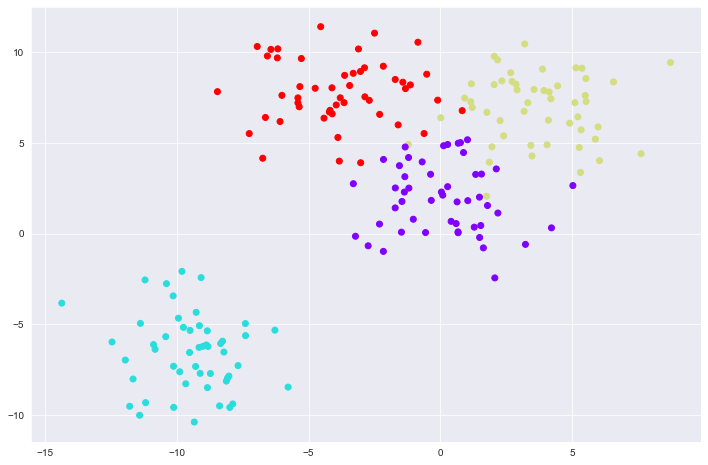

In [20]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='rainbow')

### Creating the clusters

In [ ]:
from sklearn.cluster import KMeans

In [28]:
kmeans = KMeans(n_clusters=6)

In [29]:
kmeans.fit(data[0])

C:\Users\Ranganath ShankarRao\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ranganath ShankarRao\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6)

In [30]:
kmeans.cluster_centers_

array([[ 0.17066869,  0.83882482],
       [-9.67203831, -5.13061964],
       [-4.20023386,  8.08871617],
       [ 4.18453299,  7.06415829],
       [-9.18960987, -8.53584776],
       [-0.1932902 ,  4.81567669]])

In [31]:
kmeans.labels_

array([2, 3, 5, 3, 3, 1, 3, 0, 3, 5, 2, 0, 3, 3, 2, 0, 3, 0, 1, 2, 1, 0,
       5, 4, 2, 4, 4, 0, 3, 3, 2, 4, 3, 0, 0, 2, 1, 1, 4, 0, 1, 2, 2, 2,
       0, 5, 2, 5, 4, 5, 0, 2, 3, 0, 1, 5, 5, 0, 2, 3, 4, 5, 1, 2, 3, 0,
       1, 3, 3, 1, 3, 5, 1, 5, 1, 3, 3, 0, 2, 5, 5, 1, 3, 1, 0, 0, 0, 2,
       5, 1, 4, 1, 1, 5, 5, 4, 3, 2, 1, 3, 5, 1, 5, 0, 5, 5, 1, 3, 4, 1,
       3, 2, 2, 3, 4, 3, 2, 2, 5, 2, 5, 2, 0, 2, 0, 3, 2, 0, 4, 2, 2, 2,
       0, 4, 1, 2, 3, 5, 3, 0, 4, 3, 1, 2, 2, 3, 5, 4, 2, 2, 2, 2, 0, 3,
       0, 2, 5, 3, 3, 0, 3, 0, 5, 2, 1, 2, 0, 3, 2, 0, 3, 0, 2, 5, 5, 2,
       3, 5, 4, 3, 2, 4, 4, 2, 1, 4, 1, 4, 4, 0, 1, 3, 3, 2, 1, 5, 3, 3,
       1, 0])

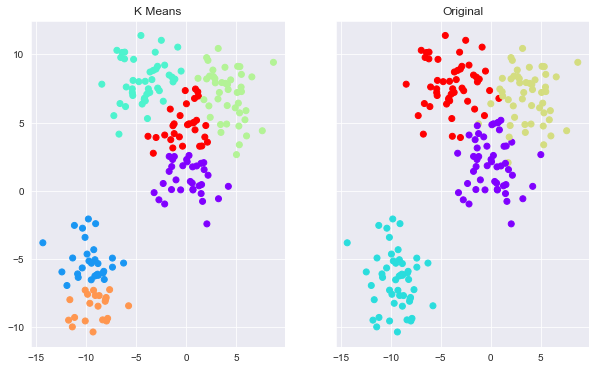

In [32]:
f, (ax1,ax2) = plt.subplots(1,2,sharey=True, figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0], data[0][:,1], c=kmeans.labels_, cmap='rainbow')
ax2.set_title('Original')
ax2.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='rainbow')